In [1]:
# 필요 라이브러리 import 
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 윈저사이저 적용
df = pd.read_csv('../분류모델 + 성능평가/label지정.csv', encoding='CP949')
df.drop(['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '산업명', '소속코드', 'month'],axis=1,inplace=True)
for col in df.columns:
     df[col] = winsorize(df[col], limits= 0.01)

In [3]:
# Data set1 라쏘로 선정된 피처들 분리
df = df.sort_values(["year"],ascending=True)
df_data = df[['[제조]총자본투자효율','[제조]재고자산회전기간','[제조]총자본증가율','[제조]매출액순이익률','[제조]부채비율',
              '[제조]자기자본순이익률','[제조]자본분배율']]
# df_data_scaled= StandardScaler().fit_transform(df_data)
# df_data_scaled= MinMaxScaler().fit_transform(df_data)
# df_data_scaled = pd.DataFrame(df_data_scaled)
# df_data_scaled.columns =[['[제조]유동자산구성비율','[제조]자기자본구성비율','[제조]총자본증가율','[제조]자기자본증가율',
# '[제조]현금비율','[제조]부채비율','[제조]매출채권회전률','[제조]노동소득분배율','[제조]자기자본배율']]
# df[['[제조]유동자산구성비율','[제조]자기자본구성비율','[제조]총자본증가율',
# '[제조]자기자본증가율','[제조]현금비율','[제조]부채비율','[제조]매출채권회전률','[제조]노동소득분배율','[제조]자기자본배율']] = df_data_scaled[['[제조]유동자산구성비율','[제조]자기자본구성비율','[제조]총자본증가율','[제조]자기자본증가율','[제조]현금비율','[제조]부채비율','[제조]매출채권회전률','[제조]노동소득분배율','[제조]자기자본배율']]
df =df.reset_index(drop="index")
df.describe()

,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,[제조]총자본증가율,[제조]자기자본증가율,[제조]유동자산증가율,[제조]순이익증가율,[제조]재고자산증가율,[제조]매출액총이익률,[제조]매출액순이익률,...,[제조]설비투자효율,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,label
count,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,...,10662.000000,1.066200e+04,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000
mean,10.040534,23.361944,16.704286,12.220262,15.836482,14.723224,25.650324,18.858264,22.463340,-10.183054,...,221.716125,2.677133e+04,18.035400,74.612863,13.690038,-21.099724,10.324715,119.613665,2015.869818,0.015757
std,42.182144,99.770390,51.054379,33.196715,52.173915,47.879051,176.733747,88.655826,18.500643,53.231124,...,720.931744,2.023488e+05,40.843982,103.639510,100.123553,156.026445,24.863801,635.198913,2.882518,0.124539
min,-67.340000,-77.660000,-58.530000,-47.320000,-76.570000,-62.460000,-712.840000,-85.890000,-20.170000,-377.340000,...,-1512.180000,-1.210066e+04,-255.080000,0.000000,-710.100000,-1161.000000,0.290000,-245.990000,2011.000000,0.000000
25%,-9.657500,-5.257500,-4.167500,-3.217500,-1.920000,-8.830000,-31.597500,-11.220000,9.960000,-5.770000,...,30.782500,7.957000e+01,12.020000,38.280000,2.385000,-0.297500,1.660000,-0.687500,2013.000000,0.000000
50%,4.300000,1.440000,4.485000,5.520000,5.870000,5.535000,0.000000,0.000000,18.760000,2.330000,...,65.950000,2.685100e+02,21.785000,57.065000,35.020000,10.985000,3.030000,2.470000,2016.000000,0.000000
75%,19.100000,17.970000,21.067500,17.827500,17.110000,23.542500,38.895000,22.117500,32.007500,7.927500,...,136.275000,1.303918e+03,34.447500,76.037500,52.097500,28.827500,6.407500,17.077500,2018.000000,0.000000
max,244.000000,760.870000,333.070000,187.780000,333.240000,261.040000,848.100000,644.970000,78.550000,41.160000,...,4902.680000,1.921618e+06,85.720000,810.100000,85.040000,72.920000,175.190000,5431.730000,2020.000000,1.000000


In [4]:
# train test set 분리
df1 = df[df['year']<2019] #train
df2 = df[df['year']>=2019] #test
# train data label 분리 test data label 분리
X_train= df1[['[제조]총자본투자효율','[제조]재고자산회전기간','[제조]총자본증가율','[제조]매출액순이익률','[제조]부채비율',
              '[제조]자기자본순이익률','[제조]자본분배율']]
X_test = df2[['[제조]총자본투자효율','[제조]재고자산회전기간','[제조]총자본증가율','[제조]매출액순이익률','[제조]부채비율',
              '[제조]자기자본순이익률','[제조]자본분배율']]
y_train = df1["label"]
y_test = df2["label"]

# x_train_scaled= StandardScaler().fit_transform(X_train)
# x_test_scaled = fit_transform(X_test)
# # df_data_scaled= MinMaxScaler().fit_transform(df_data)
# X_train_scaled = pd.DataFrame(x_train_scaled)
X_test.describe()

,[제조]총자본투자효율,[제조]재고자산회전기간,[제조]총자본증가율,[제조]매출액순이익률,[제조]부채비율,[제조]자기자본순이익률,[제조]자본분배율
count,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000
mean,14.930175,59.111110,13.330016,-18.047857,93.595695,-6.138442,9.528263
std,17.383800,59.881932,34.928019,71.236929,112.038792,31.632761,103.091747
min,-48.200000,0.000000,-47.320000,-377.340000,4.210000,-163.900000,-710.100000
25%,7.315000,18.400000,-3.090000,-9.990000,27.525000,-10.490000,0.000000
50%,15.970000,45.990000,5.720000,1.830000,59.770000,2.320000,31.250000
75%,23.920000,80.065000,18.880000,8.605000,115.750000,9.570000,50.870000
max,66.570000,313.400000,187.780000,41.160000,739.190000,42.780000,85.040000


In [5]:
# 기본적인 LDA 구현
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train,y_train)
lda_pred = lda_clf.predict(X_test)
lda_pred_proba = lda_clf.predict_proba(X_test)

In [6]:
from sklearn.model_selection import GridSearchCV


In [7]:
# 디시전트리 구현
from sklearn.tree import DecisionTreeClassifier       
dt_clf = DecisionTreeClassifier(random_state=52)     
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)

In [8]:

tree = DecisionTreeClassifier()

# 딕셔너리로 전달
# key: 하이퍼파라미터 명; value: [후보값들] 을 리스트로 전달
param_grid = {
    'max_depth':[2,3,4,5,6,7,8], #7개
    'min_samples_leaf':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  #4개 --> 7x4 = 총 28개의 조합
}
grid_search = GridSearchCV(tree
                          , param_grid = param_grid
                          , cv = 5 #교차검증시 fold 개수; n번의 교차검증; 데이터들이 돌아가면서 하나씩 검증(validation)에 사용되어 일반화하는 것; 데이터가 많지 않을 때 보통 쓰인다고 함
                          , n_jobs = -1)  #-1: 모든 코어 사용

grid_search.fit(X_train, y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_search.best_params_, grid_search.best_score_))

최적 하이퍼 파라미터 :{'max_depth': 3, 'min_samples_leaf': 6}, 최적 평균 정확도 :0.984


In [51]:
#최적 하이퍼 파라미터 적용 디시전 트리  
#최적 하이퍼 파라미터 :{'max_depth': 3, 'min_samples_leaf': 6}
  
dt_clf_best = DecisionTreeClassifier(random_state=52,max_depth= 3,min_samples_leaf=6)     
dt_clf_best.fit(X_train, y_train)
dt_best_pred = dt_clf_best.predict(X_test)
dt_best_pred_proba = dt_clf_best.predict_proba(X_test)

In [52]:
# 랜덤포레스트 구현
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=52)     
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)

In [10]:
# # 하이퍼파라미터 Grid-Search
 from sklearn.model_selection import GridSearchCV

# # 탐색 범위 정의
 grid_search = {'criterion': ['entropy', 'gini'],
                'max_depth': [2,4,6,8],
                'max_features': ['auto', 'sqrt'],
                'min_samples_leaf': [4,6,8.10],
                'min_samples_split': [4,6,8,10],
                'n_estimators': [20,40,60,80,100]}

 model = RandomForestClassifier()
 grid = GridSearchCV(estimator = model, param_grid = grid_search, 
                                cv = 4,verbose=0, n_jobs = -1)
 grid.fit(X_train,y_train)

# # 최선의 결과 출력
 print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid.best_params_, grid.best_score_))


IndentationError: unexpected indent (2649816611.py, line 2)

In [54]:
# 랜덤 포레스트 최적 하이퍼 파라미터 적용
# 최적 하이퍼 파라미터 :{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 6, 
#               'min_samples_split': 6, 'n_estimators': 40}, 최적 평균 정확도 :0.984
rf_clf_best = RandomForestClassifier(random_state=52, criterion = 'entropy', max_features= 'sqrt',
                                     max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=40)
rf_clf_best.fit(X_train, y_train)
rf_best_pred = rf_clf_best.predict(X_test)
rf_best_pred_proba = rf_clf_best.predict_proba(X_test)

In [55]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)


In [56]:
# #로지스틱 회귀 최적 하이퍼 파라미터
# from sklearn.model_selection import GridSearchCV

# params = {'penalty': ['l2','l1','elasticnet','None'],
#           'C':[0.01,0.1,1,1,5,10]}

# grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
# grid_clf.fit(X_train,y_train)
# print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

In [57]:
#최적 하이퍼 파라미어:{'C': 0.01, 'penalty': 'l2'}, 최적 평균 정확도:0.983
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression(C = 0.01, penalty= 'l2')
lr_clf.fit(X_train, y_train)
lr_best_pred = lr_clf.predict(X_test)
lr_best_pred_proba = lr_clf.predict_proba(X_test)

In [58]:
# KNN 모형 구현
# 3. 거리 계산을 위해서 각 특성들을 스케일링(표준화) [Z-score 표준화: 평균을 0, 표준편차 1로 변환]
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler() # Scaler 객체 생성
scaler.fit(X_train) 
knn_X_train = scaler.transform(X_train) # 스케일링(표준화 수행)
knn_X_test = scaler.transform(X_test)

# k-NN 분류기를 생성
knn_clf = KNeighborsClassifier(n_neighbors=5)
# 분류기 학습
knn_clf.fit(knn_X_train, y_train)
# 예측

knn_pred = knn_clf.predict(knn_X_test)
knn_pred_proba = knn_clf.predict_proba(X_test)


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [59]:
# # knn 파라미터 구하기
# from sklearn.metrics import accuracy_score
# for k in range(1,11):
#     knn_clf = KNeighborsClassifier(n_neighbors=k)
#     knn_clf.fit(knn_X_train, y_train)
#     knn_pred = knn_clf.predict(knn_X_test)
#     knn_score=accuracy_score(y_test,knn_pred)
#     print(k)
#     print(knn_score)
    
    

In [60]:
# knn 최적의 파라미터 모델
knn_clf = KNeighborsClassifier(n_neighbors=7)
# 분류기 학습
knn_clf.fit(knn_X_train, y_train)
# 예측

knn_best_pred = knn_clf.predict(knn_X_test)
knn_best_pred_proba = knn_clf.predict_proba(X_test)


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [61]:
#XG 부스트 모형 구현
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance 
X_train_XG= df1[['[제조]총자본투자효율','[제조]재고자산회전기간','[제조]총자본증가율','[제조]매출액순이익률','[제조]부채비율',
              '[제조]자기자본순이익률','[제조]자본분배율']]
X_train_XG.columns = [['총자본투자효율','재고자산회전기간','총자본증가율','매출액순이익률','부채비율',
              '자기자본순이익률','자본분배율']]
X_test_XG = df2[['[제조]총자본투자효율','[제조]재고자산회전기간','[제조]총자본증가율','[제조]매출액순이익률','[제조]부채비율',
              '[제조]자기자본순이익률','[제조]자본분배율']]
X_test_XG.columns =[['총자본투자효율','재고자산회전기간','총자본증가율','매출액순이익률','부채비율',
              '자기자본순이익률','자본분배율']]
y_train_XG = df1["label"]
y_test_XG = df2["label"]
X_tr_XG, X_val_XG, y_tr_XG, y_val_XG = train_test_split(X_train_XG, y_train_XG,test_size = 0.1, random_state = 156)
# df1 = df[df['year']<2019] #train
# df2 = df[df['year']>=2019] #test
# train data label 분리 test data label 분리
params_dict = {'objective' : 'binary:logistic',
               'n_estimators' : 400,
               'learning_rate' : 0.05,
               'max_depth' : 3,
               'eval_metric' : 'logloss'
               }

xgb_wrapper = XGBClassifier(Param=params_dict)

xgb_wrapper.fit(X_train_XG, y_train_XG, verbose = True)


xgb_pred = xgb_wrapper.predict(X_test)
xgb_pred_proba = xgb_wrapper.predict_proba(X_test)




[17:30:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [62]:
# #xgb 최적 하이퍼 파라미터
# from sklearn.model_selection import GridSearchCV

# params = {
#           'n_estimators':[20,40,60,80,100],
#           'learning_rate':[0.03,0.05,0.07,0.09],
#           'max_depth' : [4,6,8,10]
#           }

# grid_clf = GridSearchCV(xgb_wrapper, param_grid=params, scoring='accuracy', cv=5)
# grid_clf.fit(X_train_XG,y_train_XG)
# print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

In [63]:
# xgb부스트 최적의 파라미터
#최적 하이퍼 파라미어:{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 80}, 최적 평균 정확도:0.983
xgb_wrapper = XGBClassifier(learning_rate= 0.05, max_depth= 4, n_estimators= 80)

xgb_wrapper.fit(X_train_XG, y_train_XG, verbose = True)

xgb_best_pred = xgb_wrapper.predict(X_test)
xgb_best_pred_proba = xgb_wrapper.predict_proba(X_test)

In [64]:
#퍼셉트론 구현
# eta : 학습률 (float), n_iter : 훈련 데이터 반복 횟수 (int), w_ : 학습된 가중치 (1d-array)
class Perceptron(object):
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1): #초기화
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, X, y): #학습
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0, scale = 0.01,
                             size = 1 + X.shape[1])
        
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for i in range(len(X)):
                xi = X.iloc[i].values
                target = y[i]
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict(self, X): #추론
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]



#초기(pc)
pc_clf = Perceptron(n_iter = 10)
pc_clf.fit(X_train, y_train)
pc_pred = pc_clf.predict(X_test)






In [65]:
# from sklearn.metrics import accuracy_score

# pc_scores = []
# for i in range(1,11):
#     pc_clf = Perceptron(n_iter=i)
#     pc_clf.fit(X_train, y_train)
#     pc_pred = pc_clf.predict(X_test)
    
#     pc_scores=accuracy_score(y_test, pc_pred)
#     print(i)
#     print(pc_scores)


In [66]:
# 퍼셉트론 최적의 파라미터
pc_clf = Perceptron(n_iter = 7)
pc_clf.fit(X_train, y_train)
pc_best_pred = pc_clf.predict(X_test)



### lda_pred : 선형판별 분석 예측 값
### dt_pred : 디시전트리 예측 값
### dt_best_pred : 랜덤 포레스트 최적의 파라미터 값
### rf_pred : 랜덤 포레스트 예측 값
### rf_best_pred : 랜덤 포레스트 최적의 파라미터 값
### lr_pred : 로지스틱 회귀 예측 값
### lr_best_pred : 랜덤 포레스트 최적의 파라미터 값
### knn_pred : knn 예측 값
### knn_best_pred : knn 최적의 파라미터 값
### xgb_pred : xgb 예측 값
### xgb_best_pred : 랜덤 포레스트 최적의 파라미터 값
### pc_pred : 퍼셉트론 예측 값


In [67]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, average_precision_score


import warnings

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    pr_score = average_precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f},F1 스코어:{3:.4f}'.format(accuracy, precision, recall, f1, roc_score))
    print('ROC 스코어: {0:.4f}, PR score : {1:.4f}'.format(roc_score, pr_score))
    
print("lda") 
print(get_clf_eval(y_test, lda_pred))
print("디시전트리") 
print(get_clf_eval(y_test, dt_pred))
print("디시전트리 최적의 모델") 
print(get_clf_eval(y_test, dt_best_pred))
print("랜덤포레스트") 
print(get_clf_eval(y_test, rf_pred))
print("랜덤포레스트 최적의 모델") 
print(get_clf_eval(y_test, rf_best_pred))
print("로지스틱") 
print(get_clf_eval(y_test, lr_pred))
print("로지스틱회귀 최적의 모델")
print(get_clf_eval(y_test, lr_best_pred))
print("Knn")
print(get_clf_eval(y_test, knn_pred))
print("Knn 최적의 모델")
print(get_clf_eval(y_test, knn_best_pred))
print("xgb")
print(get_clf_eval(y_test, xgb_pred))
print("xgb 최적의 모델")
print(get_clf_eval(y_test, xgb_best_pred))
print("다중 퍼셉트론")
print(get_clf_eval(y_test, pc_pred))
print("다중 퍼셉트론 최적의 모델")
print(get_clf_eval(y_test, pc_best_pred))



lda
오차행렬
[[2414  123]
 [  19   11]]
정확도: 0.9447, 정밀도 : 0.0821, 재현율:0.3667,F1 스코어:0.1341
ROC 스코어: 0.6591, PR score : 0.0375
None
디시전트리
오차행렬
[[2472   65]
 [  25    5]]
정확도: 0.9649, 정밀도 : 0.0714, 재현율:0.1667,F1 스코어:0.1000
ROC 스코어: 0.5705, PR score : 0.0216
None
디시전트리 최적의 모델
오차행렬
[[2523   14]
 [  26    4]]
정확도: 0.9844, 정밀도 : 0.2222, 재현율:0.1333,F1 스코어:0.1667
ROC 스코어: 0.5639, PR score : 0.0398
None
랜덤포레스트
오차행렬
[[2530    7]
 [  25    5]]
정확도: 0.9875, 정밀도 : 0.4167, 재현율:0.1667,F1 스코어:0.2381
ROC 스코어: 0.5820, PR score : 0.0792
None
랜덤포레스트 최적의 모델
오차행렬
[[2532    5]
 [  27    3]]
정확도: 0.9875, 정밀도 : 0.3750, 재현율:0.1000,F1 스코어:0.1579
ROC 스코어: 0.5490, PR score : 0.0480
None
로지스틱
오차행렬
[[2532    5]
 [  29    1]]
정확도: 0.9868, 정밀도 : 0.1667, 재현율:0.0333,F1 스코어:0.0556
ROC 스코어: 0.5157, PR score : 0.0169
None
로지스틱회귀 최적의 모델
오차행렬
[[2532    5]
 [  29    1]]
정확도: 0.9868, 정밀도 : 0.1667, 재현율:0.0333,F1 스코어:0.0556
ROC 스코어: 0.5157, PR score : 0.0169
None
Knn
오차행렬
[[2530    7]
 [  27    3]]
정확도: 0.9868, 정밀도 : 0.3000, 재현율:0.

In [68]:
# 임계값에 따른 오차행렬및 스코어 
from sklearn.preprocessing import Binarizer
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# thresholds = [0.6,0.65,0.7,0.75,0.8,0.85,0.9]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(y_test, custom_predict)
# lda 임계값 행렬 F1 스코어가 제일 좋은 임계값 0.7  
get_eval_by_threshold(y_test , lda_pred_proba[:,1].reshape(-1,1), thresholds)
# get_eval_by_threshold(y_test , lda_pred[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[2351  186]
 [  16   14]]
정확도: 0.9213, 정밀도 : 0.0700, 재현율:0.4667,F1 스코어:0.1217
ROC 스코어: 0.6967, PR score : 0.0389
임곗값: 0.2
오차행렬
[[2385  152]
 [  17   13]]
정확도: 0.9342, 정밀도 : 0.0788, 재현율:0.4333,F1 스코어:0.1333
ROC 스코어: 0.6867, PR score : 0.0408
임곗값: 0.3
오차행렬
[[2394  143]
 [  18   12]]
정확도: 0.9373, 정밀도 : 0.0774, 재현율:0.4000,F1 스코어:0.1297
ROC 스코어: 0.6718, PR score : 0.0380
임곗값: 0.4
오차행렬
[[2405  132]
 [  19   11]]
정확도: 0.9412, 정밀도 : 0.0769, 재현율:0.3667,F1 스코어:0.1272
ROC 스코어: 0.6573, PR score : 0.0356
임곗값: 0.5
오차행렬
[[2414  123]
 [  19   11]]
정확도: 0.9447, 정밀도 : 0.0821, 재현율:0.3667,F1 스코어:0.1341
ROC 스코어: 0.6591, PR score : 0.0375
임곗값: 0.6
오차행렬
[[2423  114]
 [  20   10]]
정확도: 0.9478, 정밀도 : 0.0806, 재현율:0.3333,F1 스코어:0.1299
ROC 스코어: 0.6442, PR score : 0.0347
임곗값: 0.7
오차행렬
[[2435  102]
 [  20   10]]
정확도: 0.9525, 정밀도 : 0.0893, 재현율:0.3333,F1 스코어:0.1408
ROC 스코어: 0.6466, PR score : 0.0376
임곗값: 0.8
오차행렬
[[2442   95]
 [  22    8]]
정확도: 0.9544, 정밀도 : 0.0777, 재현율:0.2667,F1 스코어:0.1203
ROC 스코어: 0.

In [69]:
#디시전 트리
# 성능값 일정
get_eval_by_threshold(y_test , dt_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2472   65]
 [  25    5]]
정확도: 0.9649, 정밀도 : 0.0714, 재현율:0.1667,F1 스코어:0.1000
ROC 스코어: 0.5705, PR score : 0.0216
임곗값: 0.2
오차행렬
[[2472   65]
 [  25    5]]
정확도: 0.9649, 정밀도 : 0.0714, 재현율:0.1667,F1 스코어:0.1000
ROC 스코어: 0.5705, PR score : 0.0216
임곗값: 0.3
오차행렬
[[2472   65]
 [  25    5]]
정확도: 0.9649, 정밀도 : 0.0714, 재현율:0.1667,F1 스코어:0.1000
ROC 스코어: 0.5705, PR score : 0.0216
임곗값: 0.4
오차행렬
[[2472   65]
 [  25    5]]
정확도: 0.9649, 정밀도 : 0.0714, 재현율:0.1667,F1 스코어:0.1000
ROC 스코어: 0.5705, PR score : 0.0216
임곗값: 0.5
오차행렬
[[2472   65]
 [  25    5]]
정확도: 0.9649, 정밀도 : 0.0714, 재현율:0.1667,F1 스코어:0.1000
ROC 스코어: 0.5705, PR score : 0.0216
임곗값: 0.6
오차행렬
[[2472   65]
 [  25    5]]
정확도: 0.9649, 정밀도 : 0.0714, 재현율:0.1667,F1 스코어:0.1000
ROC 스코어: 0.5705, PR score : 0.0216
임곗값: 0.7
오차행렬
[[2472   65]
 [  25    5]]
정확도: 0.9649, 정밀도 : 0.0714, 재현율:0.1667,F1 스코어:0.1000
ROC 스코어: 0.5705, PR score : 0.0216
임곗값: 0.8
오차행렬
[[2472   65]
 [  25    5]]
정확도: 0.9649, 정밀도 : 0.0714, 재현율:0.1667,F1 스코어:0.1000
ROC 스코어: 0.

In [70]:
# 디시전트리 최적
# 임계값 0.3 때 F1 스코어가 가장 좋음 재현율은 0.1
get_eval_by_threshold(y_test , dt_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2455   82]
 [  21    9]]
정확도: 0.9599, 정밀도 : 0.0989, 재현율:0.3000,F1 스코어:0.1488
ROC 스코어: 0.6338, PR score : 0.0379
임곗값: 0.2
오차행렬
[[2520   17]
 [  23    7]]
정확도: 0.9844, 정밀도 : 0.2917, 재현율:0.2333,F1 스코어:0.2593
ROC 스코어: 0.6133, PR score : 0.0770
임곗값: 0.3
오차행렬
[[2520   17]
 [  23    7]]
정확도: 0.9844, 정밀도 : 0.2917, 재현율:0.2333,F1 스코어:0.2593
ROC 스코어: 0.6133, PR score : 0.0770
임곗값: 0.4
오차행렬
[[2520   17]
 [  23    7]]
정확도: 0.9844, 정밀도 : 0.2917, 재현율:0.2333,F1 스코어:0.2593
ROC 스코어: 0.6133, PR score : 0.0770
임곗값: 0.5
오차행렬
[[2523   14]
 [  26    4]]
정확도: 0.9844, 정밀도 : 0.2222, 재현율:0.1333,F1 스코어:0.1667
ROC 스코어: 0.5639, PR score : 0.0398
임곗값: 0.6
오차행렬
[[2535    2]
 [  29    1]]
정확도: 0.9879, 정밀도 : 0.3333, 재현율:0.0333,F1 스코어:0.0606
ROC 스코어: 0.5163, PR score : 0.0224
임곗값: 0.7
오차행렬
[[2535    2]
 [  29    1]]
정확도: 0.9879, 정밀도 : 0.3333, 재현율:0.0333,F1 스코어:0.0606
ROC 스코어: 0.5163, PR score : 0.0224
임곗값: 0.8
오차행렬
[[2535    2]
 [  29    1]]
정확도: 0.9879, 정밀도 : 0.3333, 재현율:0.0333,F1 스코어:0.0606
ROC 스코어: 0.

In [71]:
#로지스틱 회귀
#0.1 때 F1 스코어가 제일 좋음
get_eval_by_threshold(y_test , lr_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2463   74]
 [  19   11]]
정확도: 0.9638, 정밀도 : 0.1294, 재현율:0.3667,F1 스코어:0.1913
ROC 스코어: 0.6687, PR score : 0.0549
임곗값: 0.2
오차행렬
[[2499   38]
 [  23    7]]
정확도: 0.9762, 정밀도 : 0.1556, 재현율:0.2333,F1 스코어:0.1867
ROC 스코어: 0.6092, PR score : 0.0453
임곗값: 0.3
오차행렬
[[2515   22]
 [  26    4]]
정확도: 0.9813, 정밀도 : 0.1538, 재현율:0.1333,F1 스코어:0.1429
ROC 스코어: 0.5623, PR score : 0.0306
임곗값: 0.4
오차행렬
[[2525   12]
 [  28    2]]
정확도: 0.9844, 정밀도 : 0.1429, 재현율:0.0667,F1 스코어:0.0909
ROC 스코어: 0.5310, PR score : 0.0204
임곗값: 0.5
오차행렬
[[2532    5]
 [  29    1]]
정확도: 0.9868, 정밀도 : 0.1667, 재현율:0.0333,F1 스코어:0.0556
ROC 스코어: 0.5157, PR score : 0.0169
임곗값: 0.6
오차행렬
[[2533    4]
 [  29    1]]
정확도: 0.9871, 정밀도 : 0.2000, 재현율:0.0333,F1 스코어:0.0571
ROC 스코어: 0.5159, PR score : 0.0180
임곗값: 0.7
오차행렬
[[2536    1]
 [  29    1]]
정확도: 0.9883, 정밀도 : 0.5000, 재현율:0.0333,F1 스코어:0.0625
ROC 스코어: 0.5165, PR score : 0.0280
임곗값: 0.8
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
# 로지 회귀 최적 파라미터
# 임계값 0.1일때 F1 스코어 최대
get_eval_by_threshold(y_test , lr_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2463   74]
 [  19   11]]
정확도: 0.9638, 정밀도 : 0.1294, 재현율:0.3667,F1 스코어:0.1913
ROC 스코어: 0.6687, PR score : 0.0549
임곗값: 0.2
오차행렬
[[2499   38]
 [  23    7]]
정확도: 0.9762, 정밀도 : 0.1556, 재현율:0.2333,F1 스코어:0.1867
ROC 스코어: 0.6092, PR score : 0.0453
임곗값: 0.3
오차행렬
[[2515   22]
 [  26    4]]
정확도: 0.9813, 정밀도 : 0.1538, 재현율:0.1333,F1 스코어:0.1429
ROC 스코어: 0.5623, PR score : 0.0306
임곗값: 0.4
오차행렬
[[2525   12]
 [  28    2]]
정확도: 0.9844, 정밀도 : 0.1429, 재현율:0.0667,F1 스코어:0.0909
ROC 스코어: 0.5310, PR score : 0.0204
임곗값: 0.5
오차행렬
[[2532    5]
 [  29    1]]
정확도: 0.9868, 정밀도 : 0.1667, 재현율:0.0333,F1 스코어:0.0556
ROC 스코어: 0.5157, PR score : 0.0169
임곗값: 0.6
오차행렬
[[2533    4]
 [  29    1]]
정확도: 0.9871, 정밀도 : 0.2000, 재현율:0.0333,F1 스코어:0.0571
ROC 스코어: 0.5159, PR score : 0.0180
임곗값: 0.7
오차행렬
[[2536    1]
 [  29    1]]
정확도: 0.9883, 정밀도 : 0.5000, 재현율:0.0333,F1 스코어:0.0625
ROC 스코어: 0.5165, PR score : 0.0280
임곗값: 0.8
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
#랜덤 포레스트
# 임계값 0.4일 때 F1스코어 최대
get_eval_by_threshold(y_test , rf_pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[2413  124]
 [  17   13]]
정확도: 0.9451, 정밀도 : 0.0949, 재현율:0.4333,F1 스코어:0.1557
ROC 스코어: 0.6922, PR score : 0.0477
임곗값: 0.2
오차행렬
[[2496   41]
 [  20   10]]
정확도: 0.9762, 정밀도 : 0.1961, 재현율:0.3333,F1 스코어:0.2469
ROC 스코어: 0.6586, PR score : 0.0732
임곗값: 0.3
오차행렬
[[2513   24]
 [  24    6]]
정확도: 0.9813, 정밀도 : 0.2000, 재현율:0.2000,F1 스코어:0.2000
ROC 스코어: 0.5953, PR score : 0.0493
임곗값: 0.4
오차행렬
[[2526   11]
 [  24    6]]
정확도: 0.9864, 정밀도 : 0.3529, 재현율:0.2000,F1 스코어:0.2553
ROC 스코어: 0.5978, PR score : 0.0799
임곗값: 0.5
오차행렬
[[2530    7]
 [  25    5]]
정확도: 0.9875, 정밀도 : 0.4167, 재현율:0.1667,F1 스코어:0.2381
ROC 스코어: 0.5820, PR score : 0.0792
임곗값: 0.6
오차행렬
[[2531    6]
 [  26    4]]
정확도: 0.9875, 정밀도 : 0.4000, 재현율:0.1333,F1 스코어:0.2000
ROC 스코어: 0.5655, PR score : 0.0635
임곗값: 0.7
오차행렬
[[2536    1]
 [  27    3]]
정확도: 0.9891, 정밀도 : 0.7500, 재현율:0.1000,F1 스코어:0.1765
ROC 스코어: 0.5498, PR score : 0.0855
임곗값: 0.8
오차행렬
[[2537    0]
 [  29    1]]
정확도: 0.9887, 정밀도 : 1.0000, 재현율:0.0333,F1 스코어:0.0645
ROC 스코어: 0.

In [74]:
#랜덤 포레스트 최적 파라미터 
#임계값 0.4일 때 최대
get_eval_by_threshold(y_test , rf_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2451   86]
 [  18   12]]
정확도: 0.9595, 정밀도 : 0.1224, 재현율:0.4000,F1 스코어:0.1875
ROC 스코어: 0.6831, PR score : 0.0560
임곗값: 0.2
오차행렬
[[2503   34]
 [  22    8]]
정확도: 0.9782, 정밀도 : 0.1905, 재현율:0.2667,F1 스코어:0.2222
ROC 스코어: 0.6266, PR score : 0.0594
임곗값: 0.3
오차행렬
[[2524   13]
 [  24    6]]
정확도: 0.9856, 정밀도 : 0.3158, 재현율:0.2000,F1 스코어:0.2449
ROC 스코어: 0.5974, PR score : 0.0725
임곗값: 0.4
오차행렬
[[2530    7]
 [  24    6]]
정확도: 0.9879, 정밀도 : 0.4615, 재현율:0.2000,F1 스코어:0.2791
ROC 스코어: 0.5986, PR score : 0.1017
임곗값: 0.5
오차행렬
[[2532    5]
 [  27    3]]
정확도: 0.9875, 정밀도 : 0.3750, 재현율:0.1000,F1 스코어:0.1579
ROC 스코어: 0.5490, PR score : 0.0480
임곗값: 0.6
오차행렬
[[2536    1]
 [  27    3]]
정확도: 0.9891, 정밀도 : 0.7500, 재현율:0.1000,F1 스코어:0.1765
ROC 스코어: 0.5498, PR score : 0.0855
임곗값: 0.7
오차행렬
[[2537    0]
 [  29    1]]
정확도: 0.9887, 정밀도 : 1.0000, 재현율:0.0333,F1 스코어:0.0645
ROC 스코어: 0.5167, PR score : 0.0446
임곗값: 0.8
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
#knn 
#임계값 0.4일때 최대
get_eval_by_threshold(y_test , knn_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1419 1118]
 [   6   24]]
정확도: 0.5621, 정밀도 : 0.0210, 재현율:0.8000,F1 스코어:0.0410
ROC 스코어: 0.6797, PR score : 0.0191
임곗값: 0.2
오차행렬
[[2162  375]
 [  10   20]]
정확도: 0.8500, 정밀도 : 0.0506, 재현율:0.6667,F1 스코어:0.0941
ROC 스코어: 0.7594, PR score : 0.0377
임곗값: 0.3
오차행렬
[[2162  375]
 [  10   20]]
정확도: 0.8500, 정밀도 : 0.0506, 재현율:0.6667,F1 스코어:0.0941
ROC 스코어: 0.7594, PR score : 0.0377
임곗값: 0.4
오차행렬
[[2326  211]
 [  16   14]]
정확도: 0.9116, 정밀도 : 0.0622, 재현율:0.4667,F1 스코어:0.1098
ROC 스코어: 0.6917, PR score : 0.0353
임곗값: 0.5
오차행렬
[[2326  211]
 [  16   14]]
정확도: 0.9116, 정밀도 : 0.0622, 재현율:0.4667,F1 스코어:0.1098
ROC 스코어: 0.6917, PR score : 0.0353
임곗값: 0.6
오차행렬
[[2468   69]
 [  27    3]]
정확도: 0.9626, 정밀도 : 0.0417, 재현율:0.1000,F1 스코어:0.0588
ROC 스코어: 0.5364, PR score : 0.0147
임곗값: 0.7
오차행렬
[[2468   69]
 [  27    3]]
정확도: 0.9626, 정밀도 : 0.0417, 재현율:0.1000,F1 스코어:0.0588
ROC 스코어: 0.5364, PR score : 0.0147
임곗값: 0.8
오차행렬
[[2534    3]
 [  29    1]]
정확도: 0.9875, 정밀도 : 0.2500, 재현율:0.0333,F1 스코어:0.0588
ROC 스코어: 0.

In [76]:
#knn 최적 파라미터 적용
#임계값. 0.5
get_eval_by_threshold(y_test , knn_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1262 1275]
 [   3   27]]
정확도: 0.5021, 정밀도 : 0.0207, 재현율:0.9000,F1 스코어:0.0405
ROC 스코어: 0.6987, PR score : 0.0198
임곗값: 0.2
오차행렬
[[2018  519]
 [  10   20]]
정확도: 0.7939, 정밀도 : 0.0371, 재현율:0.6667,F1 스코어:0.0703
ROC 스코어: 0.7310, PR score : 0.0286
임곗값: 0.3
오차행렬
[[2210  327]
 [  12   18]]
정확도: 0.8679, 정밀도 : 0.0522, 재현율:0.6000,F1 스코어:0.0960
ROC 스코어: 0.7356, PR score : 0.0360
임곗값: 0.4
오차행렬
[[2210  327]
 [  12   18]]
정확도: 0.8679, 정밀도 : 0.0522, 재현율:0.6000,F1 스코어:0.0960
ROC 스코어: 0.7356, PR score : 0.0360
임곗값: 0.5
오차행렬
[[2367  170]
 [  18   12]]
정확도: 0.9268, 정밀도 : 0.0659, 재현율:0.4000,F1 스코어:0.1132
ROC 스코어: 0.6665, PR score : 0.0334
임곗값: 0.6
오차행렬
[[2493   44]
 [  29    1]]
정확도: 0.9716, 정밀도 : 0.0222, 재현율:0.0333,F1 스코어:0.0267
ROC 스코어: 0.5080, PR score : 0.0120
임곗값: 0.7
오차행렬
[[2493   44]
 [  29    1]]
정확도: 0.9716, 정밀도 : 0.0222, 재현율:0.0333,F1 스코어:0.0267
ROC 스코어: 0.5080, PR score : 0.0120
임곗값: 0.8
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
#xgb 
#입계값 0.3일 때 최대
get_eval_by_threshold(y_test , xgb_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2491   46]
 [  20   10]]
정확도: 0.9743, 정밀도 : 0.1786, 재현율:0.3333,F1 스코어:0.2326
ROC 스코어: 0.6576, PR score : 0.0673
임곗값: 0.2
오차행렬
[[2511   26]
 [  22    8]]
정확도: 0.9813, 정밀도 : 0.2353, 재현율:0.2667,F1 스코어:0.2500
ROC 스코어: 0.6282, PR score : 0.0713
임곗값: 0.3
오차행렬
[[2518   19]
 [  23    7]]
정확도: 0.9836, 정밀도 : 0.2692, 재현율:0.2333,F1 스코어:0.2500
ROC 스코어: 0.6129, PR score : 0.0718
임곗값: 0.4
오차행렬
[[2522   15]
 [  24    6]]
정확도: 0.9848, 정밀도 : 0.2857, 재현율:0.2000,F1 스코어:0.2353
ROC 스코어: 0.5970, PR score : 0.0665
임곗값: 0.5
오차행렬
[[2524   13]
 [  24    6]]
정확도: 0.9856, 정밀도 : 0.3158, 재현율:0.2000,F1 스코어:0.2449
ROC 스코어: 0.5974, PR score : 0.0725
임곗값: 0.6
오차행렬
[[2526   11]
 [  25    5]]
정확도: 0.9860, 정밀도 : 0.3125, 재현율:0.1667,F1 스코어:0.2174
ROC 스코어: 0.5812, PR score : 0.0618
임곗값: 0.7
오차행렬
[[2528    9]
 [  26    4]]
정확도: 0.9864, 정밀도 : 0.3077, 재현율:0.1333,F1 스코어:0.1860
ROC 스코어: 0.5649, PR score : 0.0512
임곗값: 0.8
오차행렬
[[2529    8]
 [  26    4]]
정확도: 0.9868, 정밀도 : 0.3333, 재현율:0.1333,F1 스코어:0.1905
ROC 스코어: 0.

In [78]:
# xgb 최적 파라미터 적용
# 임계값 0.2일때 최대
get_eval_by_threshold(y_test , xgb_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2460   77]
 [  19   11]]
정확도: 0.9626, 정밀도 : 0.1250, 재현율:0.3667,F1 스코어:0.1864
ROC 스코어: 0.6682, PR score : 0.0532
임곗값: 0.2
오차행렬
[[2505   32]
 [  21    9]]
정확도: 0.9794, 정밀도 : 0.2195, 재현율:0.3000,F1 스코어:0.2535
ROC 스코어: 0.6437, PR score : 0.0740
임곗값: 0.3
오차행렬
[[2518   19]
 [  23    7]]
정확도: 0.9836, 정밀도 : 0.2692, 재현율:0.2333,F1 스코어:0.2500
ROC 스코어: 0.6129, PR score : 0.0718
임곗값: 0.4
오차행렬
[[2523   14]
 [  25    5]]
정확도: 0.9848, 정밀도 : 0.2632, 재현율:0.1667,F1 스코어:0.2041
ROC 스코어: 0.5806, PR score : 0.0536
임곗값: 0.5
오차행렬
[[2531    6]
 [  25    5]]
정확도: 0.9879, 정밀도 : 0.4545, 재현율:0.1667,F1 스코어:0.2439
ROC 스코어: 0.5822, PR score : 0.0855
임곗값: 0.6
오차행렬
[[2534    3]
 [  26    4]]
정확도: 0.9887, 정밀도 : 0.5714, 재현율:0.1333,F1 스코어:0.2162
ROC 스코어: 0.5661, PR score : 0.0863
임곗값: 0.7
오차행렬
[[2534    3]
 [  28    2]]
정확도: 0.9879, 정밀도 : 0.4000, 재현율:0.0667,F1 스코어:0.1143
ROC 스코어: 0.5327, PR score : 0.0376
임곗값: 0.8
오차행렬
[[2536    1]
 [  28    2]]
정확도: 0.9887, 정밀도 : 0.6667, 재현율:0.0667,F1 스코어:0.1212
ROC 스코어: 0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


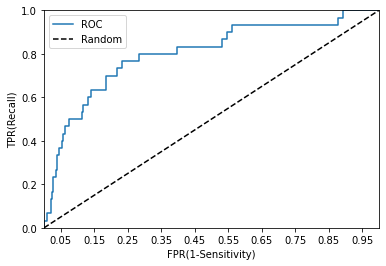

lda의 ROC AUC값: 0.8020


In [79]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lda_clf.predict_proba(X_test)[:,1])
pred_proba = lda_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))


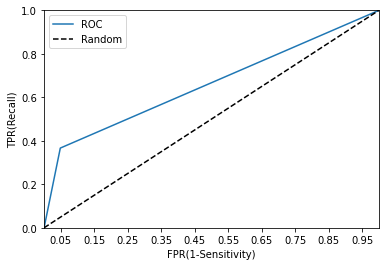

lda의 ROC AUC값: 0.6591


In [80]:
roc_curve_plot(y_test, lda_clf.predict(X_test))
roc_score = roc_auc_score(y_test, lda_pred)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))

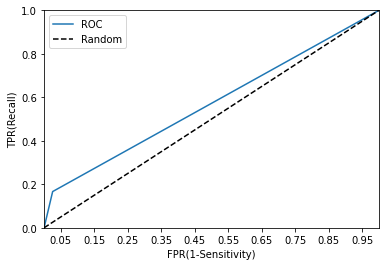

dt ROC AUC값: 0.5705


In [81]:
roc_curve_plot(y_test, dt_clf.predict_proba(X_test)[:,1])
pred_proba = dt_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('dt ROC AUC값: {0:.4f}'.format(roc_score))


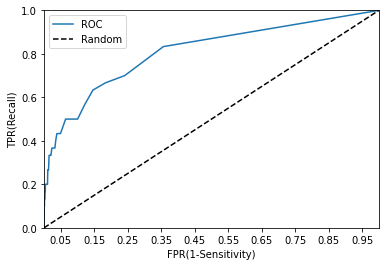

rf ROC AUC값: 0.8095


In [82]:
roc_curve_plot(y_test, rf_clf.predict_proba(X_test)[:,1])
pred_proba = rf_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('rf ROC AUC값: {0:.4f}'.format(roc_score))

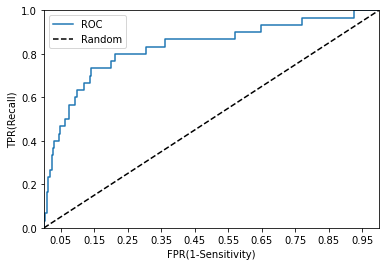

lr ROC AUC값: 0.8313


In [83]:
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])
pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('lr ROC AUC값: {0:.4f}'.format(roc_score))

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


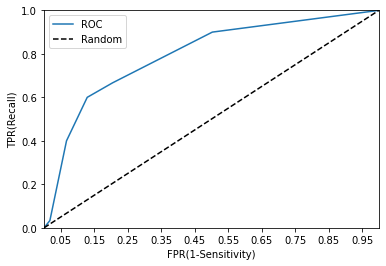

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


knn ROC AUC값: 0.7959


In [84]:
roc_curve_plot(y_test, knn_clf.predict_proba(X_test)[:,1])
pred_proba = knn_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('knn ROC AUC값: {0:.4f}'.format(roc_score))